##  Customer Retention Case Study with detailed data analysis.

*E-retail factors for customer activation and retention: A case study from Indian e-commerce customers
Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase or repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction. This is also represented in the use case diagram below.*

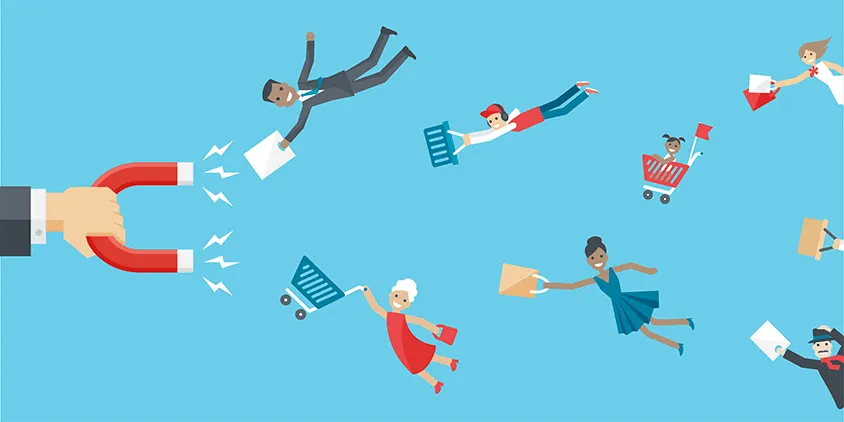

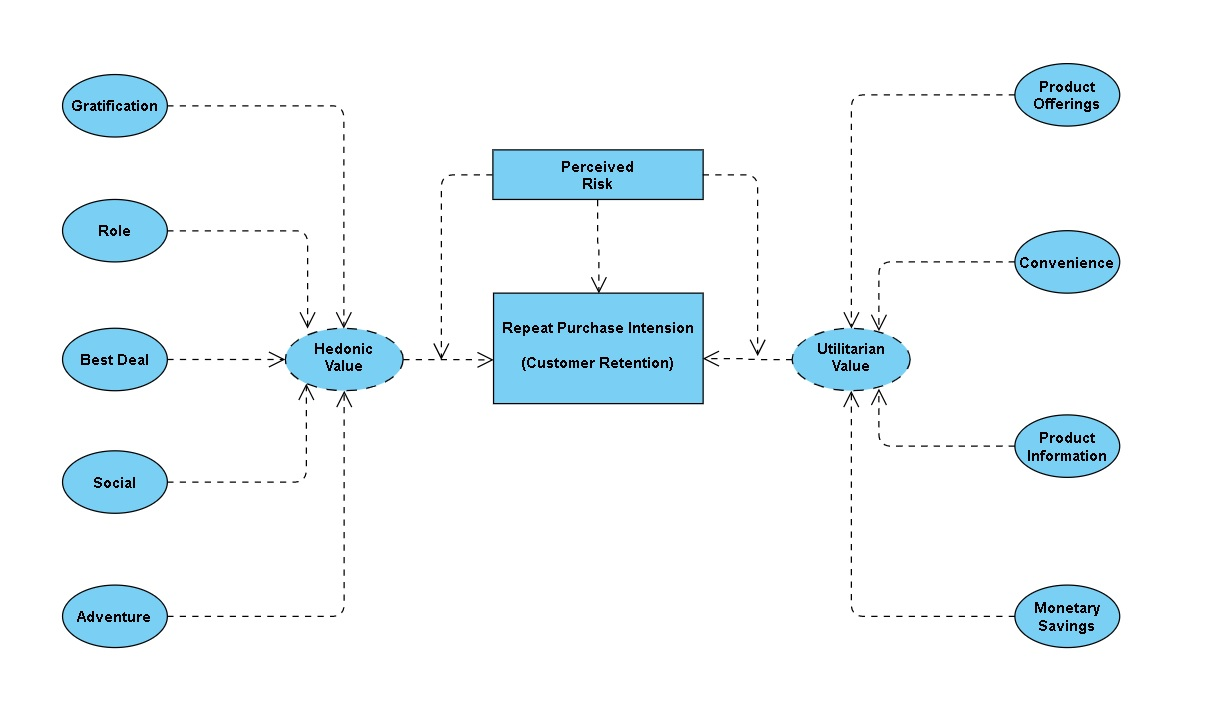

In [ ]:
# Importing all the necessary libraries/dependencies here.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import pandas_profiling
import missingno

In [ ]:
# in the above cell I have stored the excel file and then separated the spreadsheets in 2 different dataframes.

xls = pd.ExcelFile('customer_retention_dataset.xlsx')
df1 = pd.read_excel(xls, 'datasheet') # sheet 1
df2 = pd.read_excel(xls, 'codedsheet') # sheet 2

In [ ]:
df1 # checking the first 5 and last 5 rows

We can see that the spreadsheet named "datasheet" consists of 269 rows and 71 columns in it.

In [ ]:
df2 # checking the first 5 and last 5 rows

We can see that the spreadsheet named "codedsheet" consists of 269 rows and 71 columns as well however there are columns which are in categorical coded format.

# Exploratory Data Analysis (EDA)

In [ ]:
# Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe

In [ ]:
df1.columns

*Using columns we can see all the 71 column names from the datasheet page*

In [ ]:
df1.rename(columns = {'1Gender of respondent':'Gender', 
       '2 How old are you? ':'Age',
       '3 Which city do you shop online from?':'City',
       '4 What is the Pin Code of where you shop online from?':'Pin Code',
       '5 Since How Long You are Shopping Online ?':'Online Shopping Duration',
       '6 How many times you have made an online purchase in the past 1 year?':'Online purchase in past 1 year',
       '7 How do you access the internet while shopping on-line?':'Mode of internet access',
       '8 Which device do you use to access the online shopping?':'Device used for internet access',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'Screen size of mobile',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'Operating System',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'Browser',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'Channel used for 1st visit',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'Online store access post 1st visit',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'Time invested to explore and purchase',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'Preferred payment option',
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'Frequency to abandon purchase from a cart',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'Reason to abandon purchase from a cart',
       '18 The content on the website must be easy to read and understand':'Shopping website content readability',
       '19 Information on similar product to the one highlighted  is important for product comparison':'Importance of product comparison content',
       '20 Complete information on listed seller and product being offered is important for purchase decision.':'Importance of seller and product detail for purchase decision',
       '21 All relevant information on listed products must be stated clearly':'Clarity on relevant information for products',
       '22 Ease of navigation in website':'Ease of navigation on website', 
       '23 Loading and processing speed':'Loading and processing speed of website',
       '24 User friendly Interface of the website':'Ease of access on GUI of website',
       '25 Convenient Payment methods':'Convenient/Most used payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'On time product delivery',
       '27 Empathy (readiness to assist with queries) towards the customers':'Empathy towards the customer',
       '28 Being able to guarantee the privacy of the customer':'Privacy guarantee of the customer',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Support availability via various means',
       '30 Online shopping gives monetary benefit and discounts':'Offers and Discounts on online shopping',
       '31 Enjoyment is derived from shopping online':'Enjoyment quotient in online shopping',
       '32 Shopping online is convenient and flexible':'Flexibity in online shopping',
       '33 Return and replacement policy of the e-tailer is important for purchase decision':'Return and Replacement policy',
       '34 Gaining access to loyalty programs is a benefit of shopping online':'Loyalty program benefits',
       '35 Displaying quality Information on the website improves satisfaction of customers':'Quality of website content',
       '36 User derive satisfaction while shopping on a good quality website or application':'User satisfaction',
       '37 Net Benefit derived from shopping online can lead to users satisfaction':'Net benefit',
       '38 User satisfaction cannot exist without trust':'User satisfaction with trust factor',
       '39 Offering a wide variety of listed product in several category':'Wide range of products',
       '40 Provision of complete and relevant product information':'Relevance in product details',
       '41 Monetary savings':'Monetary savings',
       '42 The Convenience of patronizing the online retailer':'Frequency of purchase from a seller',
       '43 Shopping on the website gives you the sense of adventure':'Sense of adventure',
       '44 Shopping on your preferred e-tailer enhances your social status':'Social status',
       '45 You feel gratification shopping on your favorite e-tailer':'Pleasure in shopping from a seller',
       '46 Shopping on the website helps you fulfill certain roles':'Fulfill roles from shopping',
       '47 Getting value for money spent':'Value for money',
       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'List of online shopping websites',
       'Easy to use website or application':'Ease of access on an online website',
       'Visual appealing web-page layout':'Website layout', 
       'Wild variety of product on offer':'Variety of products on offer',
       'Complete, relevant description information of products':'Completeness of product description',
       'Fast loading website speed of website and application':'Website access speed',
       'Reliability of the website or application':'Reliability of website',
       'Quickness to complete purchase':'Ease to complete purchase',
       'Availability of several payment options':'Payment option availability', 
       'Speedy order delivery ':'Fast delivery',
       'Privacy of customers’ information':'Customer privacy',
       'Security of customer financial information':'Security on payment details',
       'Perceived Trustworthiness':'Trust worthiness',
       'Presence of online assistance through multi-channel':'Online presence of support team',
       'Longer time to get logged in (promotion, sales period)':'Time to login website on special offer days',
       'Longer time in displaying graphics and photos (promotion, sales period)':'Time to load media on special offer days',
       'Late declaration of price (promotion, sales period)':'Delay in declaring special offer details',
       'Longer page loading time (promotion, sales period)':'Time to load website on special offer days',
       'Limited mode of payment on most products (promotion, sales period)':'Limited mode of payment on special offer days',
       'Longer delivery period':'Delayed product delivery', 
       'Change in website/Application design':'Change in GUI',
       'Frequent disruption when moving from one page to another':'Issue accessing multiple pages of a website',
       'Website is as efficient as before':'Efficiency of website at all times',
       'Which of the Indian online retailer would you recommend to a friend?':'Recommendation quotient'},
           inplace = True)

*With the help of rename I was able to change the names of columns that were too lengthy and could have been accomodated in shorter formats. I wanted to drop the ill formated column names and replace them with meaningful names that I can understand further.*

In [ ]:
print("We have {} Rows and {} Columns in our dataframe".format(df1.shape[0], df1.shape[1]))
df1.head()

*Taking a look at the first 5 rows of our datasheet data frame after renaming the column names*

In [ ]:
df1.isna().sum() # checking for missing values

*Using the isna and sum fuctions together on our dataframe we can take a look at missing data information. It looks like we do not have any missing values present in any of our columns. However we can confirm the same with visual on it.*

In [ ]:
missingno.matrix(df1, figsize = (15,5))

*From the above matrix we can see that non of the rows show any sign of missing value and all 71 columns are filled with some or the other data in it.*

In [ ]:
df1.describe(include="all").T

*With the help of describe method in transpose format we are able to take a look at our column details clearly. The count column once again confirms that there are no missing data concern in our dataset. Also I have used the include all parameter in the describe method to ensure all the columns are displayed irrespective of it being a numeric or text data column.*

In [ ]:
df1.info() # checking the datatype information on columns

*Using the info method on our dataframe we see that there is only 1 integer datatype column while 70 object datatype columns.*

In [ ]:
df1.nunique().to_frame("Unique Values")

*In the above cell nunique gives us a list of total number of unique values present in each column of our dataframe.*

In [ ]:
object_datatype = []
for x in df1.dtypes.index:
    if df1.dtypes[x] == 'O':
        object_datatype.append(x)
object_datatype

*I have stored the renamed object datatype column names as a list in 1 variable for ease of acess in further analysis. The only column with integer datatype is "Pin Code".*

In [ ]:
for col in object_datatype:
    print(col)
    print(df1[col].value_counts())
    print("="*120)

*have listed down all the categorical data column values to see clearly what are are unique values and how many rows they cover in our dataframe.*

# Visualization

In [ ]:
for col in df1[object_datatype]:
    plt.figure(figsize=(10,6))
    col_name = col
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="viridis")

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(df1[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of rows covered")
    plt.xticks(rotation=90)
    plt.show()

**Observations:**

* Pin code: 201308 (Uttar Pradesh) has the maximum number of counts for online shopping.
* Female buyer has more number of count than male in the Dataset.
* Buyer Age between 31 to 40 years is more followed by 21-30 years for online shopping.
* Delhi city has a maximum number of buyers followed by greater Noida & Noida. Bulandshahr city has a minimum number of buyers for online shopping.
* Tenure wise maximum buyers are preferred online shopping since 4+ years.
* Maximum number of online buyers purchased less than 10 products in past one year.
* Using mobile phone internet is more for online shopping.
* Smart Phone has been used more for online shopping followed by laptop.
* Smartphones having screen sizes other than 4.7, 5.5 & 5 inches had been used more times for online shopping.
* Devices having a windows operating system has been used often more for online shopping followed by android.
* Google Chrome browser is used maximum times to access the website as compared to other browsers.
* Search engine is more useful for the potential online buyers, also after the 1st visit to the store, the search engine has been used more to locate the website.
* Usually buyers explore the particular website more than 15 times before making a purchase decision.
* Credit/Debit has been used more than other options for online purchases.
* Maximum buyer chooses to add the product to the cart & leave without making payment because of a better alternative offer.
* Content & all relevant information on the website is easy to read & understand, also easy to navigate for a maximum number of the online buyer.
* Maximum number of people strongly agree that information on a similar product to the one highlighted is important for product comparison.
* Maximum number of people strongly agree that complete information on the listed sellers and the product being offered is important for purchase decisions.
* Most buyers strongly agree that the loading & processing speed of the website should be fast which makes the website user- friendly.
* For online purchases, the payment method is a key factor to retain the customer, also buyers trust that online retail stores would fulfill their part of the transaction at the stipulated time.
* More number of buyer strongly agree that customer service & customer privacy is very much important to retain the customer.
* Online shopping provides monetary benefits and discounts on the product that customers would buy for & visit the website again to shop more as it is value for money spent.
* Maximum number of people enjoys online shopping, which is more convenient & easy to use.
* Most buyers strongly agree that the return & replacement policy is important for purchase decisions.
* People strongly agreed that gaining access to loyalty programs is a benefit of online shopping.
* Maximum number of buyers strongly agree that provided quality information on the website improves satisfaction & trust of the customer.
* Offering a wide variety of products in several categories with correct information helps to retain the customer.
* Frequent online shopping gives a sense of adventure.
* Shopping on your preferred e-tailer enhances your social status is indifferent to the maximum number of buyers.
* Maximum buyer feels that it is ok to shop from a favorite e-tailer.
* Most people prefer to shop online from Amazon.in, Flipkart.com, Paytm.com, Myntra.com & Snapdeal.com as these are more user friendly.
* According to the survey, the best visually appealing web page layout is Amazon.in & flipkart.com.
* Wide variety of products & its offer are mostly available on Amazon.in & flipkart.com.
* Complete, relevant description information of products are available in Amazon.in & flipkart.com.
* Amazon is best in terms of Trustworthiness/reliability, quickness to complete purchase & fast loading speed on website & application.
* Amazon & Flipkart.com has several payment options whereas Snapdeal has a limited mode of payment method.
* Amazon comes in number 1 position in terms of delivery of products & security of customer information followed by flipkart.com whereas Paytm took longer time to deliver the products.
* Amazon.in provides the best customer support followed by Flipkart.com, Myntra.com, & Snapdeal.
* Flipkart.com takes less time to get logged in(promotion, sales period), however, Amazon.in takes a long time to logged in.
* When it comes to displaying graphics & photos(promotion, sales period), Amazon.in & flipkart.com take a longer time to load.
* Myntra delays to declare its sale price & offers, also took a long time to load the page followed by paytm.com.
* With time Amazon update/changes its website/Application design as Amazon disrupts frequently when moving one page to another & still works efficiently as before.
* Most recommended Indian online retailer by a friend is Amazon followed by Flipkart.

In [ ]:
pandas_profiling.ProfileReport(df1)

**if you are checking this notebook, kindly run the code due to large size of file it is not uploading on github so i have cleared the cell data to reduce the size.**

*pandas-profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. It generates interactive reports in web format that can be presented to any person, even if they don’t know programming. It also offers report generation for the dataset with lots of features and customizations for the report generated. In short, what pandas-profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.*

In [ ]:
for col in df1:
    if col == "Gender":
        pass
    elif col == "Pin Code":
        pass
    else:
        plt.style.use('seaborn-white')
        plt.figure(figsize=(10,8))
        sns.countplot(x=col, data=df1, hue="Gender")
        plt.title("{} column with respect to Gender details".format(col))
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.ylabel("Number of rows")
        plt.show()

**Observations:**

* Above 41-50 years and less than 20 years, female and male respondents count difference is not much.
* From Bangalore and Greater Noida, many respondents are female.
* From Noida and Delhi, many respondents are male.
* Both men and women shopping from desktop count are almost same. However, more women shop from either smartphone or laptop.
* Most of the women come back to shopping website by using search engine.
* Many women prefer to use search engine or app, rather than direct URL. However, men prefer to use search engine and Url and app little less. So we can understand that women use app more than men.
* Women spend more time than men during online shopping and the time is mostly more than 15 mins, followed by 11-15 mins.
* Women too compare the products with other websites and is one of the reasons to leave the cart without shopping.
* Women prefer more loyalpoints than men.
* More women disagree that online shopping is a kind of adventure. So websites need to work towards giving real time experience as this can be a big marketing strategy.
* Women dont feel that online shopping fulfills certain roles.

In [ ]:
for col in df1:
    if col == "Age":
        pass
    elif col == "Pin Code":
        pass
    else:
        plt.style.use('seaborn-muted')
        plt.figure(figsize=(10,8))
        sns.countplot(x=col, data=df1, hue="Age")
        plt.title("{} column with respect to Age details".format(col))
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.ylabel("Number of rows")
        plt.show()

**Observations:**

* From gender I can say male are less and female are more means female use to do more shopping.
* From age 21-30 and 31-40 years of people use to do more shopping and peoples who are 50 years old and above they do very less shopping.
* From Since How Long You are Shopping Online I can say peoples at the age of 4 years start online shopping.
* From How many times you have made an online purchase in the past 1 year I can say less then 10 times has high count and and 42 times and above have least count means mostly people buy less then 10 mines a year
* From How do you access the internet while shopping on-line we can see people used to buy using mobile internet more and very few use dialup.
* From Which device do you use to access the online shopping I can say people use there smartphones more then laptops and very few uses tablet.
* From What is the screen size of your mobile device I can say other have the highest count as 5.5 inch and least 5 inch size
* From What is the operating system (OS) of your device I can say mostly people use window phones then android and then less people use ios for inline shopping.
* From What browser do you run on your device to access the website I can say mostly all people use google crome and very less people use firefox.
* From Which channel did you follow to arrive at your favorite online store for the first time People mostly use search engine to buy something.
* From After first visit, how do you reach the online retail store I can say people used search engine or app for this
* From How much time do you explore the e- retail store before making a purchase decision i can say mostly people use to take 15 min and very few people take 1 min only.
* From What is your preferred payment Option i can say mostly people use credit/debit card then 2nd prefrence of people are cash on delivery then least they use E-wallet.
* From How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart i can say the highest count have sometimes and the least count have very frequently.
* From reason to abandon purchase from shopping cart I can say better offer has the high count means people get some other best offer and it has least count of lack of trust and no prefered payment means people dont have trust and they dont find there best preffered method.
* From The content on the website must be easy to read and understand people have voted more for strongly agree and agree they want while shopping they can easily read the content of site.
* From Information on similar product to the one highlighted is important for product comparison I can say people have voted strongly agree and agree on this.

In [ ]:
for col in df1:
    if col == "City":
        pass
    elif col == "Pin Code":
        pass
    else:
        plt.style.use('seaborn-colorblind')
        plt.figure(figsize=(10,8))
        sns.countplot(x=col, data=df1, hue="City")
        plt.title("{} column with respect to City details".format(col))
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.ylabel("Number of rows")
        plt.show()

**Observations:**

* There are more women respondents than men. It could be that data collection is mainly focused on women.
* Amongst the respondents, the major class targetted is between 21-40 years, followed by 41-50 and less than 20 years. We can understand that the correspondents are mostly from working class.
* The respondents are majorly residing in cities like Delhi, Greater Noida, Noida and Bangalore.
* Majority are shopping online for more than 4 years. There are considerable people who are shopping online since less than one year and also it shows that many new customers are being added every year.
* We can observe that many have shopped less than 10 times in the past year.
* Many of them use mobile to shop online, followed by laptop, desktop and tablet.
* Windows constitute the major OS of the customer device, followed by Android and Mac.
* Google Chrome is majorly used to access the shopping website.
* People are becoming customers of their favorite stores by using the search engine. Content marketing or display advertisements are not that impactful when coming to online marketing. So companies should spend more on advertising on search engines.
* For repeated visits, people use search engine first, followed by app and direct URL. We can see that difference between app and search engine is small.
* Majority of the people spend more than 15 minutes before making a purchase, followed by 6-10 minutes.
* The major payment method used by all is credit/debit cards, followed by COD and e-wallets.
* People have mentioned that sometimes they would leave the cart without purchasing and the major reason they have mentioned is that they are finding some better alternative offer. It means that people are comparing from many online websites before making any purchase.
* Customers strongly agree that content of website must be easy to read and understandable.
* Majority of customers want information of similar products to make purchase.
* Majority of the customers want complete information on listed sellers and their products being offered.
* Customers want all relevant information on the listed products and very less customers disagree to that.
* The customers wanted the websites to be easily navigated.
* Majority of the customers wanted high loading and processing speed, user friendly interface of website, convenient payment method, high trust on website, empathy towards customers, guarantee privacy of customers, responsiveness-availability of several communication channels, etc.
* People feel that online shopping provides monitory benefits and discounts.
* Customers also feel that shopping online is convenient and flexible.
* Return policy is important for deciding the product purchase to many customers.
* Many customers find shopping through online helps them financially because of cost and discount factors.
* When it comes to certain factors like gratification, social status enhancement because of shopping, or whether shopping online gives a thrill or adventure, customers are more indifferent to these. So, there is an ample scope in giving more enhanced experienced to customers in this regard.

# Encoding the categorical object datatype columns

In [ ]:
# Ordinal Encoding

oe = OrdinalEncoder()

def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = df1.columns
df=ordinal_encode(df1, oe_col)
df.head()

*I have made use of OrdinalEncoder to convert categorical object datatype columns into numeric values. Since we do not have any label present in our dataset there was no point in using label encoder. Also our dataset has 71 columns so using One Hot Encoding would have only increased the number of columns.*

In [ ]:
plt.style.use('seaborn-bright')

df.hist(figsize=(40,50))
plt.show()

**Findings:**

* Major Consumers of online shopping are females.
* From Ages 31 - 40 years mostly use online mode of shopping.
* Delhi has maximum number of consumers for online shopping.
* Amazon and Flipkart are the most reliable Website/Application for online shopping on the basis of customer satisfaction.
* Paytm, Myntra and Snapdeal needs more development to reach further in terms of customer satisfaction.
* Finally in Ease of Application, Highly used, Overall customer satisfaction and Highly recommended platform is Amazon for online Shopping.

# Correlation using a Heatmap

* Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
* Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [ ]:
upper_triangle = np.triu(df1.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

*In the above heatmap due to lot of columns we are not able to see the correlation details however we can observe the color coding details and get a hint that there is no multi collinearity concern between the column values.*

# Correlation Bar Plot comparing Gender column with the remaining columns

In [ ]:
plt.style.use('seaborn-pastel')

column_names = df1.columns
for col in df1[column_names]:
    df_corr = df1.corr()
    plt.figure(figsize=(16,6))
    df_corr[col].sort_values(ascending=False).drop(col).plot.bar()
    plt.title("Correlation of {} Column vs Remaining Columns\n".format(col), fontsize=16)
    plt.xlabel("\nColumn Names", fontsize=14)
    plt.ylabel("Correlation Values", fontsize=12)
    plt.show()

*Since the heatmap was not clear in terms of it's values I have generated this barplot for each column vs remaining column showing the positive and negative correlation data.*

# Inference:

### 1. Amazon.com

**To be improved:**
* During promotions, try to give a disturbance free shopping experience to customers.
* Give more payment options to customers.
* Try to give price early during promotion.
* Reduce the delivery time of the products.

**Positive feedback summary:**
* Convenient to use and also a good website for shopping.
* Fast delivery of products.
* Availability of complete information of the products.
* Presence of online assistance through multi-channels.
* Reliable website or app, perceived trustworthiness.

### 2. Flipkart.com

**To be improved:**
* During promotions, try to give a disturbance free shopping experience to customers.
* Give more payment options to customers.
* Try to give the price early during promotion.
* Reduce the delivery time of the products.
* Flipkart and Amazon almost share the same feedbacks with varying percentages as the only difference.

**Positive feedback summary:**
* Convenient to use and also a good website for shopping.
* Fast delivery of products.
* Availability of complete information of the products.
* Presence of online assistance through multi-channels.
* Reliable website or app, perceived trustworthiness.
* Wild variety of products to offer.

### 3. Myntra.com

**To be improved:**
* During promotions, try to give a disturbance free shopping experience to customers.
* Try to give the price early during promotions.
* Reduce the delivery time of the products during promotions.

**Positive feedback summary:**
* Convenient to use and also a good website.
* Availability of several payment options.
* Faster products delivery.
* Complete information of products available.
* Reliable website or app, perceived trustworthiness.
* Wild variety of product to offer

### 4. Paytm.com

**To be improved:***
* Reduce the delivery time of the products during promotions.
* Try to give the price early during promotion.
* During promotions, try to give a disturbance free shopping experience to customers.
* Late declaration of price and discounts.
* Frequent disturbance is occurring while moving from one page to another.

**Positive feedback summary**
* Convenient to use and a good website.
* Quickness to complete a purchase.
* About 64% of the customers feel that either web or app is reliable.
* Around 20% of the customers believe that paytm has a wild variety of products on offer.

### 5. Snapdeal.com
**To be improved:**
* Reduce the delivery time of the products during promotions.
* Try to give the price early during promotion.
* During promotions, try to give a disturbance free shopping experience to customers.
* Late declaration of price and discounts.
* No one has expressed to recommend snapdeal to a contact as it has the most negative feedbacks among all other websites.

**Positive feedback summary:**
* Convenient to use.
* 54% of the customers are happy about the availability of financial information security.

# Conclusion:

* Based on overall observations, the first 47 features provide insights into how e-tailer is helpful & growing based on customer inputs. The data explained how the online platform has been used more often in which CITY,PIN CODE, AGE GROUP, etc. It also showed that in some factors there is less importance given to contribute to the success of an e-commerce store, so based on that we could remove those factors & keep all the important factors, also we could improve on some factors that influence the online customers repeat purchase intention.

* Apart from the first 47 features, the rest of the features showed which online platform has been used more based on the success factors. Based on the case study for customer activation & retention, Amazon is most reliable and has been fulfilled the customer requirements. After Amazon, data showed Flipkart has been used more for online shopping.

* The case study from Indian e-commerce customers showed Amazon and Flipkart has been used mostly for Online Shopping and most recommended by Friends. So, based on the research factors, Amazon & Flipkart are the e-commerce platform, which are having the combination of both utilitarian and hedonistic values to keep the repeat purchase intention (loyalty) positively.